<a href="https://colab.research.google.com/github/yuki86/robotica/blob/master/OCR_com_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#instala keras OCR
!pip install git+https://github.com/srivatsan88/keras-ocr.git#egg=keras-ocr

  Cloning https://github.com/srivatsan88/keras-ocr.git to /tmp/pip-install-cq2zrha6/keras-ocr
  Running command git clone -q https://github.com/srivatsan88/keras-ocr.git /tmp/pip-install-cq2zrha6/keras-ocr
     |████████████████████████████████| 9.5MB 3.9MB/s 
     |████████████████████████████████| 829kB 46.2MB/s 
     |████████████████████████████████| 133kB 45.9MB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
  Created wheel for keras-ocr: filename=keras_ocr-0.8.4.post0.dev1-cp36-none-any.whl size=149924 sha256=7f7ad23c3989305b74bd5fcae9fa2e6053c7267bdeb62eac8a4275bfe70d2abd
  Stored in directory: /tmp/pip-ephem-wheel-cache-d630aznw/wheels/2e/26/f3/07cedd34c74973bd53d59727be8bb9dcfb2cf1438c4e3c746f
Successfully built keras-ocr


In [2]:
#importa bibliotecas
import matplotlib.pyplot as plt
import keras_ocr

In [3]:
#download automático de pesos pré-treinados para a detecção e reconhecimento
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [4]:
#leitura de exemplos de texto de imagens via url
images = [
    keras_ocr.tools.read(images) for images in [
        'https://images.tcdn.com.br/img/img_prod/476855/placa_aviso_proibido_acesso_476_1_20161019152118.jpg',
        'https://img.utdstc.com/screen/1/google-translate-client-002.jpg:300',
        'https://lh3.googleusercontent.com/proxy/k9YKelHZieu9JrCeHYnsEZyhyKD_CiObprQTNgPsu51K-ayr4gXa47ZkTbIFqyqCgE9Iknom-bx058NQxmNNo07QdmUQgJyw7djTahe47LoUvh2IHxZD_Eat3tma1Q'
    ]
]

In [5]:
#mostra imagem do primeiro link
%%html
<img src='https://images.tcdn.com.br/img/img_prod/476855/placa_aviso_proibido_acesso_476_1_20161019152118.jpg' />

In [6]:
##mostra imagem do segundo link
%%html
<img src='https://img.utdstc.com/screen/1/google-translate-client-002.jpg:300' />

In [7]:
##mostra imagem do terceiro link
%%html
<img src='https://lh3.googleusercontent.com/proxy/k9YKelHZieu9JrCeHYnsEZyhyKD_CiObprQTNgPsu51K-ayr4gXa47ZkTbIFqyqCgE9Iknom-bx058NQxmNNo07QdmUQgJyw7djTahe47LoUvh2IHxZD_Eat3tma1Q' />

In [8]:
#reconhece e salva as predições
prediction = pipeline.recognize(images)

In [9]:
#mostra a predição
prediction

[[('aviso', array([[279.7213 ,  89.63512],
          [668.8583 ,  87.80818],
          [669.225  , 165.91914],
          [280.088  , 167.74608]], dtype=float32)),
  ('acesso', array([[460., 217.],
          [703., 217.],
          [703., 274.],
          [460., 274.]], dtype=float32)),
  ('proibido', array([[ 68.88049, 221.0468 ],
          [368.9378 , 219.88828],
          [369.1427 , 272.95697],
          [ 69.08539, 274.1155 ]], dtype=float32)),
  ('0', array([[395., 222.],
          [434., 222.],
          [434., 269.],
          [395., 269.]], dtype=float32)),
  ('pessoas', array([[202.5814 , 284.55975],
          [511.7923 , 281.4364 ],
          [512.42523, 344.09668],
          [203.21434, 347.22003]], dtype=float32)),
  ('nao', array([[539., 284.],
          [681., 284.],
          [681., 345.],
          [539., 345.]], dtype=float32)),
  ('de', array([[ 93., 287.],
          [178., 287.],
          [178., 345.],
          [ 93., 345.]], dtype=float32)),
  ('autorizadas', arra

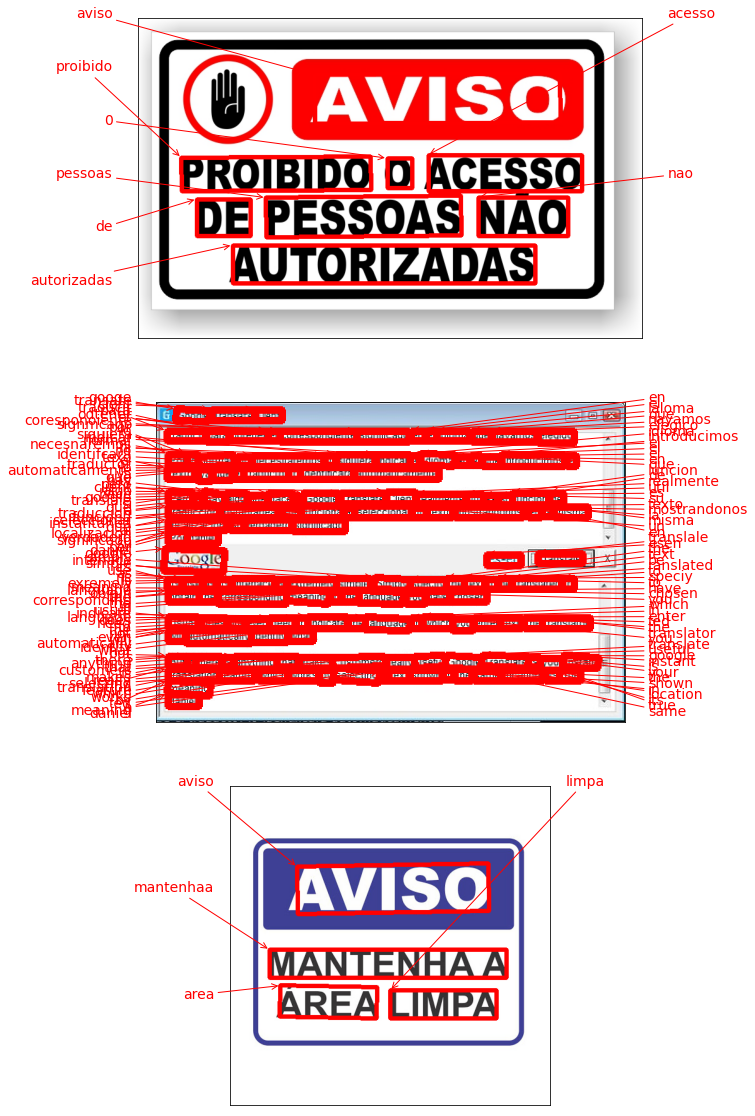

In [10]:
#mostra o texto reconhecido das imagens
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for ax, image, predictions in zip(axs, images, prediction):
    keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)